In [2]:
import pandas as pd
from konlpy.tag import Kkma
from tqdm import tqdm
from konlpy.tag import Okt
import numpy as np

In [3]:
df1=pd.read_csv('data/review (1).csv', header=2)
df2=pd.read_csv('data/review (2).csv', header=2, encoding='utf-8')
df3=pd.read_csv('data/review (3).csv', header=2)
df4=pd.read_csv('data/review (4).csv', header=2)
df5=pd.read_csv('data/review (5).csv', header=2)
df6=pd.read_csv('data/review (6).csv', header=2)
df7=pd.read_csv('data/review (7).csv', header=2)
df8=pd.read_csv('data/review (8).csv', header=2)
df9=pd.read_csv('data/review (9).csv', header=2)
df10=pd.read_csv('data/review (10).csv', header=2)
df11=pd.read_csv('data/review (11).csv', header=2)
df12=pd.read_csv('data/review (12).csv', header=2)
df13=pd.read_csv('data/review (13).csv', header=2)
df14=pd.read_csv('data/review (14).csv', header=2)
df15=pd.read_csv('data/review (15).csv', header=2)
df16=pd.read_csv('data/review (16).csv', header=2)
df17=pd.read_csv('data/review (17).csv', header=2)
df18=pd.read_csv('data/review (18).csv', header=2)
df19=pd.read_csv('data/review (19).csv', header=2)
df20=pd.read_csv('data/review (20).csv', header=2)


In [4]:
# 데이터프레임을 행 방향으로 합치기
finaldf = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20], axis=0)

# 결과 확인
finaldf=finaldf[['리뷰내용', '리뷰점수']]
finaldf.to_csv('traingsuit.csv')
finaldf

,리뷰내용,리뷰점수
0,4번째 재구매 에요!\n남편이 옷안에 꼭 하얀티 입는데 \n이제품이 면도 부드럽고 ...,5
1,빠르게 배송 입어보니까 편안하고 좋습니다,5
2,집에서 람블라 반팔티만 몇년째 입고 있습니다. 원단 좋고 가격도 좋아서 막 입기 딱...,5
3,잘 입고있습니다\n가격대비 넘 좋아요,5
4,사이즈 좋아요. 좀 얇아서 단독으로는 못입을꺼 같고 안에 이너로 입기에는 딱 좋으네요.,5
...,...,...
2995,신랑이편하고이쁘자해용,4
2996,가격대비 상품 좋음.편하고 가볍고 구김도 잘 안가는 듯,5
2997,좋네요 좋아 굿 굿,3
2998,생각보다 색상 퀄리티 좋아서 대만족햇습니다,5


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 전처리
X = finaldf['리뷰내용']
y = finaldf['리뷰점수']

# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 텍스트 데이터를 TF-IDF로 변환
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 선형 회귀 모델 생성과 훈련
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

# 테스트 세트로 예측
y_pred = model.predict(X_test_tfidf)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5068662973525954


In [22]:
new_review = ["""흡수력이 좋아요. 
기능성이네요. 
편해요"""]
new_review_tfidf = vectorizer.transform(new_review)
predicted_rating = model.predict(new_review_tfidf)
print(f"예측된 리뷰평점: {predicted_rating}")

예측된 리뷰평점: [4.93396692]


In [52]:
new_review =["""꺼끌꺼끌해요. 
            이상해요. 
            촌스러워요.
            옷이 안맞아요"""]
new_review_tfidf = vectorizer.transform(new_review)
predicted_rating = model.predict(new_review_tfidf)
print(f"예측된 리뷰평점: {predicted_rating}")

예측된 리뷰평점: [2.19634295]


In [59]:
new_review =["""핏은 나쁘지않은데 비싸요. 
            배송은 늦었는데 편해요. 
            재질이 얇지만 가격은 착해요"""]
new_review_tfidf = vectorizer.transform(new_review)
predicted_rating = model.predict(new_review_tfidf)
print(f"예측된 리뷰평점: {predicted_rating}")

예측된 리뷰평점: [3.16260112]


In [60]:
from konlpy.tag import Kkma
from konlpy.tag import Okt
import re

okt=Okt()
kkma=Kkma()

def make_df(df1):

    total = []
    for i in tqdm(df1['리뷰내용']):
        # 이모지 빼기
        t = okt.normalize(i)
        t = " ".join(re.findall("[a-zA-Z가-힣0-9]+", t))  # 수정된 정규표현식
        t = kkma.pos(t)
    
        box = []
        for j in t:
            if j[1] in ['NNG', 'NNP', 'VA'] and len(j[0]) > 1:  # 명사와 형용사 선택하고 길이가 1 이상인 단어만 포함
                box.append(j[0])
        total.append(" ".join(box))
    
    total = ' '.join(total)
    return total

In [61]:
tDF = pd.DataFrame({'내용': [make_df(finaldf)]})
tDF

100%|████████████████████████████████████████████████████████████████████████████| 60000/60000 [10:08<00:00, 98.55it/s]


,내용
0,구매 남편 하얗 제품 면도 부드럽 제일 편하 제품 거리 불편 제품 부드럽 구매 빠르...


In [62]:
tDF.to_csv('상하의리뷰내용통합.csv')

In [63]:
from collections import Counter
from konlpy.tag import Komoran

# Create Komoran morpheme analyzer
komoran = Komoran()

# Define a function to extract nouns from text
def extract_nouns(text):
    nouns = komoran.nouns(text)
    # Exclude single-character nouns
    nouns = [noun for noun in nouns if len(noun) > 1]
    return nouns
# 1에 해당하는 행들만 선택
# high_rows = tDF[tDF['내용']]

In [68]:
from tqdm import tqdm

# 한글 텍스트 데이터 예시
text_data = tDF['내용']

# 명사 추출
nouns = []
for text in tqdm(text_data):
    nouns.extend(okt.nouns(text))

# 단어 빈도 계산
word_counts = Counter(nouns)

# 상위 50개 단어 추출
top_50_words = word_counts.most_common(50)

# 결과 출력
print("상위 50개 단어:\n", top_50_words)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.76s/it]

상위 50개 단어:
 [('구매', 8574), ('배송', 7040), ('사이즈', 6711), ('만족', 5532), ('가격', 5132), ('성비', 3380), ('감사', 3272), ('여름', 2880), ('바지', 2794), ('생각', 2584), ('재질', 2537), ('색상', 2506), ('주문', 2265), ('대비', 2186), ('제품', 2117), ('길이', 2104), ('최고', 1445), ('구입', 1417), ('오버', 1285), ('상품', 1250), ('마음', 1243), ('느낌', 1199), ('세탁', 1186), ('원단', 1108), ('기장', 1090), ('착용', 1078), ('운동', 1073), ('티셔츠', 1030), ('품질', 967), ('정도', 917), ('추천', 906), ('남편', 901), ('허리', 883), ('건조기', 834), ('편안', 799), ('스판', 775), ('너', 773), ('소재', 765), ('두께', 745), ('팔', 674), ('부분', 659), ('치수', 658), ('아들', 655), ('기본', 632), ('색깔', 606), ('추가', 601), ('디자인', 593), ('사진', 585), ('다음', 578), ('색감', 578)]


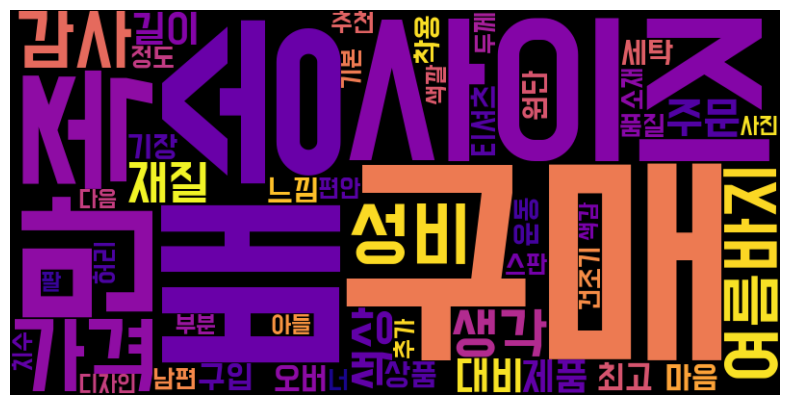

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = "BMDOHYEON_ttf.ttf"

wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 지정
    width=800,
    height=400,
    background_color='black',  # 배경색을 흰색으로 설정
    colormap='plasma',  # 색상 맵 지정
    max_words=50  # 표시할 최대 단어 수
)

# 판매량 높은 명사 빈도를 이용하여 워드클라우드 생성
# 한글 폰트를 지정한 후, wordcloud에 빈도 정보를 전달합니다
wordcloud.generate_from_frequencies(frequencies=word_counts)

# 워드클라우드를 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
